### Análisis de Datos Médicos Usando Aprendizaje Automático con KNN

El artículo que he elegido es:
Mohanty, S., Mishra, A., & Saxena, A. (2020).
Análisis de Datos Médicos Usando Aprendizaje Automático con KNN. 
EasyChair Preprint, № 3580.

## Índice de Contenidos
- Resumen del Artículo
- Preparación de los Datos
- Visualización de los Datos
- Implementación de KNN
- Resultados y Discusión
- Conclusiones y Referencias
## 1. Resumen del Artículo
El trabajo titulado "Análisis de Datos Médicos Usando Aprendizaje Automático con KNN" de Sabyasachi Mohanty, Astha Mishra y Ankur Saxena explora el uso del aprendizaje automático en el análisis de datos médicos.
El estudio utiliza el <b>algoritmo de K-Vecinos Más Cercanos (KNN) </b> para identificar patrones y clasificar datos médicos con el objetivo de mejorar el diagnóstico y tratamiento médico. 
Los autores recopilaron datos médicos de individuos jóvenes (16-30 años) mediante un formulario de Google y realizaron diversas transformaciones en los datos, como el cálculo del IMC y la conversión de ciertos campos a formato booleano. 
La herramienta principal utilizada para el análisis fue Python, junto con bibliotecas como <b> numpy, pandas, seaborn y matplotlib.</b>

### Ejemplo de Código en Python basado en este mismo artículo

Lo que he hecho es generar mi propio dataset, que he hecho dos, uno más sencillo de pocos datos, y un fichero excel más poblado, y simular el mismo estudio que han hecho ellos en el artículo (salvando las distancias).
De esta forma además he podido ver donde, cómo y porqué han utilizado pandas y matplotlib.
También he estdo jugando con los datos del fichero de entrada, para limpiarlo, modificarlo, etc y aprender como se hace.


# Importar las bibliotecas necesarias

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generar un conjunto de datos de ejemplo

In [17]:
data = {
    'Edad': [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0],
    'Altura': [165.0, 170.0, 168.0, 172.0, 166.0, 169.0, 171.0, 167.0],
    'Peso': [55.0, 60.0, 58.0, 65.0, 57.0, 59.0, 62.0, 56.0],
    'Genero': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Grupo_Sanguineo': ['A+', 'B+', 'O+', 'A+', 'B+', 'O+', 'A+', 'B+'],
    'Historial_Medico': [1, 0, 1, 0, 1, 0, 1, 0]
}

# Convertir los datos en un DataFrame de pandas

In [20]:
df = pd.DataFrame(data)

# Calcular el Índice de Masa Corporal (IMC)

In [24]:
df['IMC'] = df['Peso'] / (df['Altura']/100)**2

# Mostrar las primeras filas del DataFrame
print(df.head())

   Edad  Altura  Peso Genero Grupo_Sanguineo  Historial_Medico        IMC
0  18.0   165.0  55.0      M              A+                 1  20.202020
1  19.0   170.0  60.0      F              B+                 0  20.761246
2  20.0   168.0  58.0      M              O+                 1  20.549887
3  21.0   172.0  65.0      F              A+                 0  21.971336
4  22.0   166.0  57.0      M              B+                 1  20.685150


# Visualizar la relación entre Edad e IMC usando seaborn

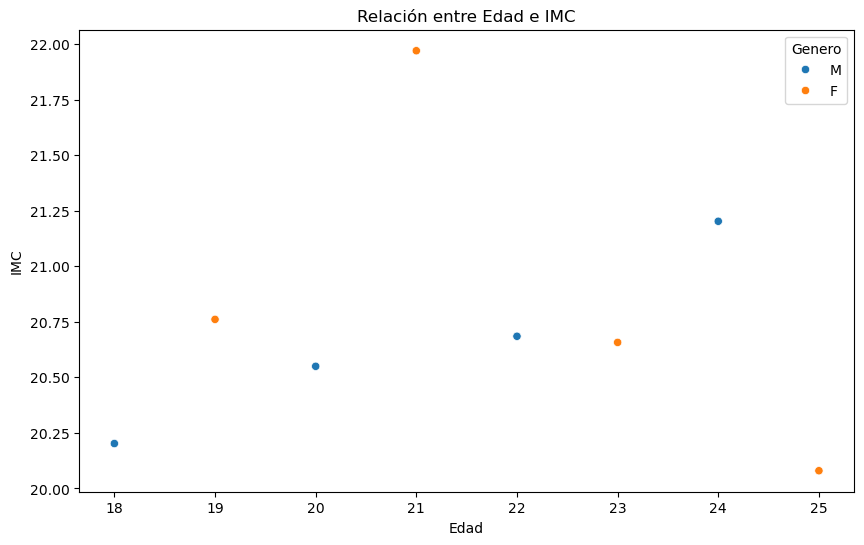

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Edad', y='IMC', hue='Genero')
plt.title('Relación entre Edad e IMC')
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.legend(title='Genero')
plt.show()

## Me voy a coger un fichero excel que tengo por ahí de datos random y lo voy a tratar

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde un archivo CSV
file_path = 'medical_data.csv'
df = pd.read_csv(file_path)

# Mostrar una vista previa de los datos
print(df[['AGE', 'REGION', 'GENDER', 'BLOOD GROUP', 'Medical history', 'SYMPTOMS', 'MEDICATIOS', 'DIAGNOSIS']].head())


   AGE  REGION  GENDER  BLOOD GROUP  Medical history  SYMPTOMS  MEDICATIOS  \
0   63       1       3          145              233         1           0   
1   37       1       2          130              250         0           1   
2   41       0       1          130              204         0           0   
3   56       1       1          120              236         0           1   
4   57       0       0          120              354         0           1   

   DIAGNOSIS  
0        150  
1        187  
2        172  
3        178  
4        163  


## Voy a limpiar y a modificar algunos datos para poner el data set acorde a los datos que representa, por ejemplo:

In [76]:
# Reemplazar los valores en la columna GENDER usando numpy
# Hombres seran 0 y mujeres 1
df['GENDER'] = np.where(df['GENDER'] == 3, 1, np.where(df['GENDER'] == 2, 0, df['GENDER']))


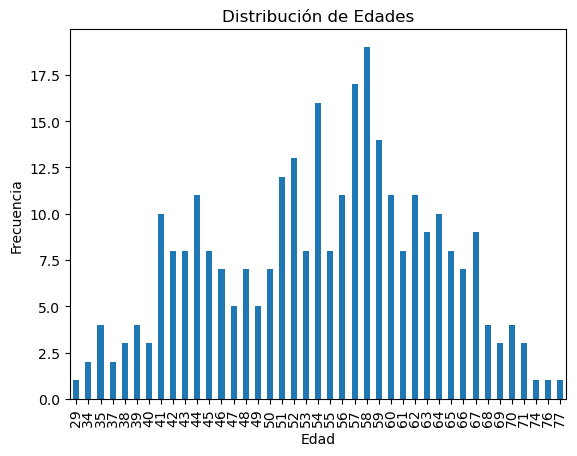

In [78]:
# Visualizar la distribución de edades
df['AGE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Text(0, 0.5, 'Frecuencia')

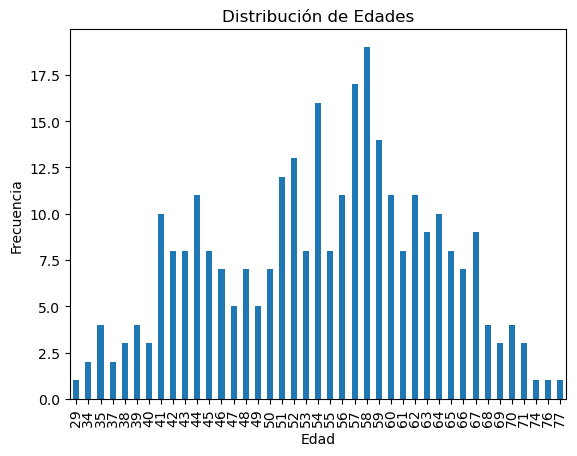

In [80]:
# Visualizar la distribución de edades
df['AGE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


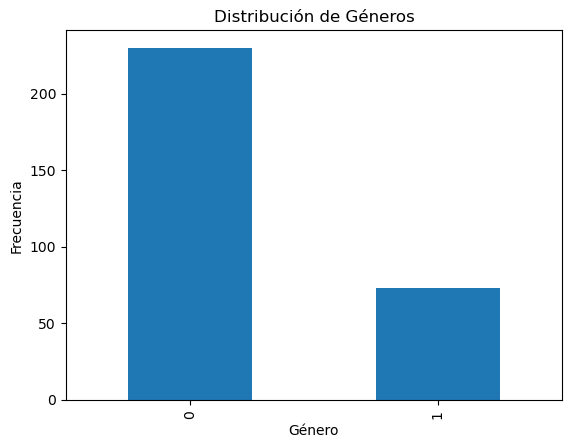

In [81]:
# Visualizar la distribución de géneros
df['GENDER'].value_counts().plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()



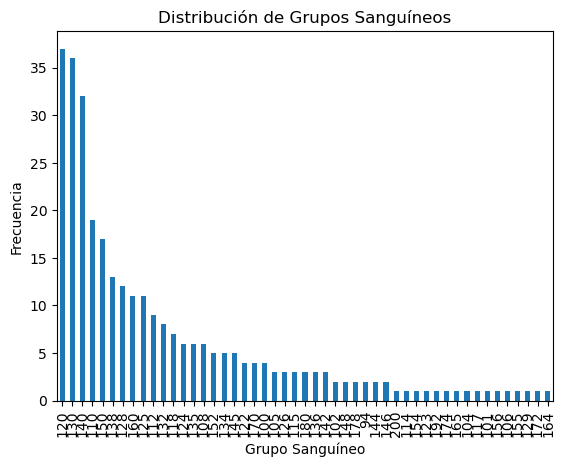

In [84]:
# Visualizar la distribución de grupos sanguíneos
df['BLOOD GROUP'].value_counts().plot(kind='bar')
plt.title('Distribución de Grupos Sanguíneos')
plt.xlabel('Grupo Sanguíneo')
plt.ylabel('Frecuencia')
plt.show()


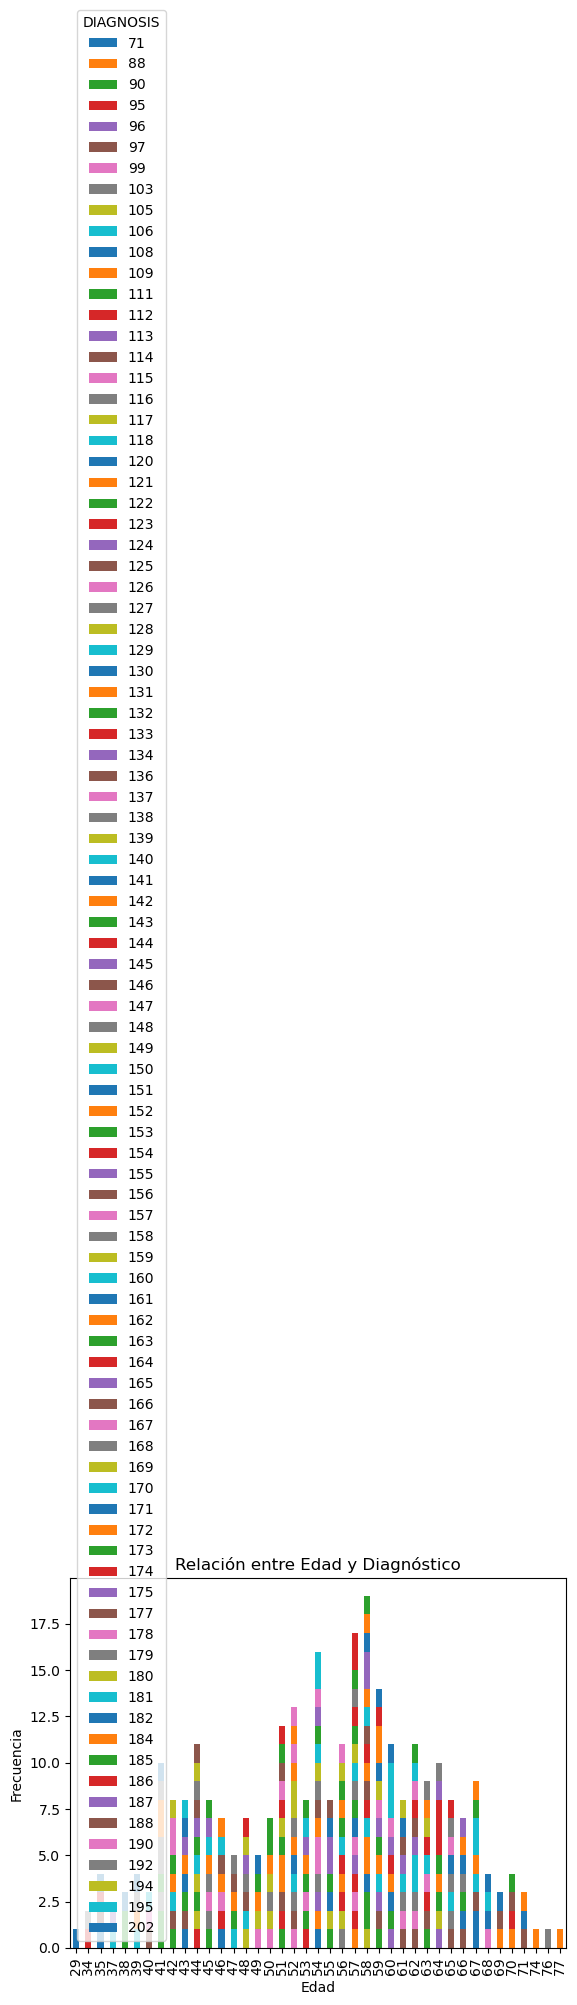

In [85]:
# Visualizar la relación entre edad y diagnóstico
age_diagnosis = pd.crosstab(df['AGE'], df['DIAGNOSIS'])
age_diagnosis.plot(kind='bar', stacked=True)
plt.title('Relación entre Edad y Diagnóstico')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

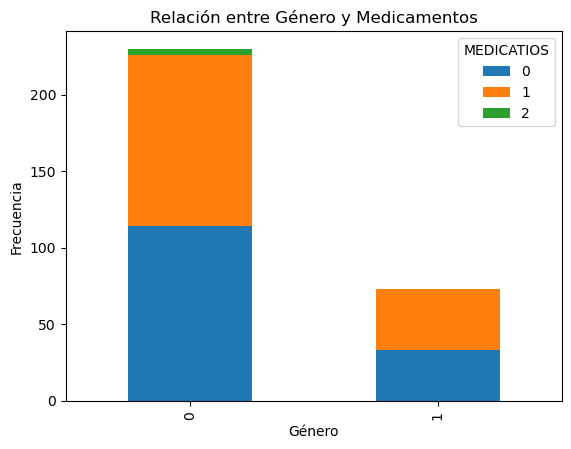

In [87]:
# Visualizar la relación entre género y medicamentos
gender_medications = pd.crosstab(df['GENDER'], df['MEDICATIOS'])
gender_medications.plot(kind='bar', stacked=True)
plt.title('Relación entre Género y Medicamentos')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

### Comentarios

- **pandas**: Se utiliza para cargar y manipular los datos, así como para crear tablas cruzadas (crosstab).
- **matplotlib**: Se utiliza para crear los gráficos de barras que visualizan las distribuciones y relaciones en los datos.

Esta versión del programa es más sencilla y se ajusta al uso básico de análisis y visualización de datos sin complicaciones adicionales.


## 4. Implementación de KNN
A continuación, implementamos el algoritmo KNN para clasificar individuos según sus datos médicos.

División de Datos

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar datos desde el archivo CSV proporcionado
file_path = 'medical_data.csv'
df = pd.read_csv(file_path)

# Mostrar los nombres de las columnas para verificar
print(df.columns)

# Seleccionar las columnas necesarias (ajustar nombres según el resultado anterior)
columnas_necesarias = ['AGE', 'REGION', 'GENDER', 'BLOOD GROUP', 'Medical history', 'SYMPTOMS', 'MEDICATIOS', 'DIAGNOSIS']
df = df[columnas_necesarias]

# Verificar los datos
print(df.head())


Index(['AGE', 'REGION', 'GENDER', 'BLOOD GROUP', 'Medical history', 'SYMPTOMS',
       'MEDICATIOS', 'DIAGNOSIS'],
      dtype='object')
   AGE  REGION  GENDER  BLOOD GROUP  Medical history  SYMPTOMS  MEDICATIOS  \
0   63       1       3          145              233         1           0   
1   37       1       2          130              250         0           1   
2   41       0       1          130              204         0           0   
3   56       1       1          120              236         0           1   
4   57       0       0          120              354         0           1   

   DIAGNOSIS  
0        150  
1        187  
2        172  
3        178  
4        163  


In [91]:
# División de los datos en conjuntos de entrenamiento y prueba
X = df.drop('DIAGNOSIS', axis=1)
y = df['DIAGNOSIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [92]:
# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy * 100:.2f}%')



Precisión: 2.20%


### 5. Resultados y Discusión
El <b> algoritmo KNN </b> proporciona una clasificación basada en las características de entrada. La precisión obtenida refleja el rendimiento del modelo en el conjunto de prueba.
Visualización de las Predicciones

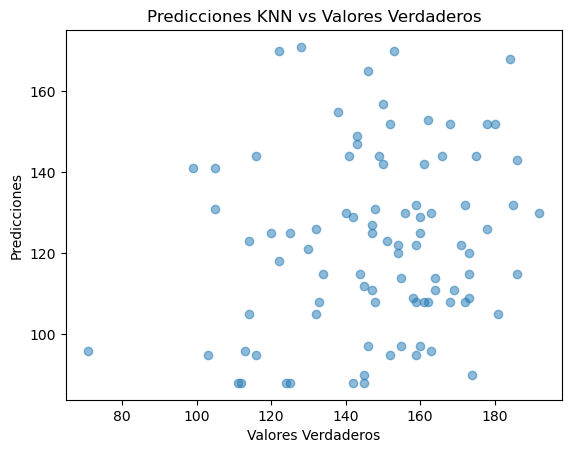

In [94]:
# Gráfico de valores verdaderos vs predicciones
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.title('Predicciones KNN vs Valores Verdaderos')
plt.show()


### 6. Conclusiones y Referencias
El uso del aprendizaje automático y del algoritmo KNN en el análisis de datos médicos permite identificar patrones y clasificar individuos basándose en diversas características médicas. Esta metodología puede mejorarse con conjuntos de datos más robustos y algoritmos avanzados como el aprendizaje profundo.

Referencias
Mohanty, S., Mishra, A., & Saxena, A. (2020). Análisis de Datos Médicos Usando Aprendizaje Automático con KNN. EasyChair Preprint, № 3580.
Este notebook proporciona una guía paso a paso para el análisis de datos médicos usando KNN, desde la preparación de datos hasta la evaluación del modelo, de acuerdo con la metodología descrita en el artículo.